<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/Malaria_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


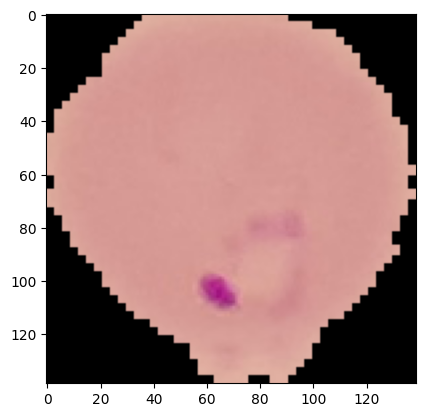

In [ ]:
import matplotlib.pyplot as plt
im=plt.imread('/content/drive/MyDrive/Colab Notebooks/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_168.png')
plt.imshow(im)
plt.show()

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#split with a ratio
#to only split into training and validation set, set a tuple ratio (.8,.2)
import splitfolders
splitfolders.ratio("/content/drive/MyDrive/Colab Notebooks/cell_images",output="output",seed=1337,ratio=(.8,.2))

Copying files: 11427 files [05:22, 35.47 files/s] 


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#all images will be rescaled by 1./255
train_data=ImageDataGenerator(
    rescale=1./255,#normalisation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)
test_data=ImageDataGenerator(rescale=1./255)
train_generator=train_data.flow_from_directory(
    "/content/output/train",
    target_size=(150,150),# all images will be resized to 150x150
    batch_size=20,
    class_mode='binary')
validation_generator=test_data.flow_from_directory(
    "/content/output/val",
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 9141 images belonging to 2 classes.
Found 2286 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
img_input=layers.Input(shape=(150,150,3))
x=layers.Conv2D(16,3,activation='relu')(img_input)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(32,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(64,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Conv2D(128,3,activation='relu')(x)
x=layers.MaxPooling2D(2)(x)
x=layers.Flatten()(x)
x=layers.Dense(512,activation='relu')(x)
x=layers.Dropout(0.5)(x)
output=layers.Dense(1,activation='sigmoid')(x)
model=Model(img_input,output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496 

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers.legacy import Adadelta
model.compile(loss='binary_crossentropy',
              optimizer=Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0),
              metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adadelta.py:82: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=100, #2000 images=batch_size * steps
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50,#1000 images=batch_size*steps
    verbose=2)

<ipython-input-9-db6dd600ce80>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/15
100/100 - 87s - loss: 0.5285 - acc: 0.7950 - val_loss: 0.5074 - val_acc: 0.7960 - 87s/epoch - 874ms/step
Epoch 2/15
100/100 - 73s - loss: 0.5392 - acc: 0.7819 - val_loss: 0.4994 - val_acc: 0.7980 - 73s/epoch - 729ms/step
Epoch 3/15
100/100 - 76s - loss: 0.5113 - acc: 0.7970 - val_loss: 0.5473 - val_acc: 0.7960 - 76s/epoch - 757ms/step
Epoch 4/15
100/100 - 73s - loss: 0.5327 - acc: 0.7825 - val_loss: 0.5443 - val_acc: 0.7780 - 73s/epoch - 733ms/step
Epoch 5/15
100/100 - 74s - loss: 0.5182 - acc: 0.7890 - val_loss: 0.5458 - val_acc: 0.7860 - 74s/epoch - 739ms/step
Epoch 6/15
100/100 - 77s - loss: 0.5380 - acc: 0.7745 - val_loss: 0.5101 - val_acc: 0.7820 - 77s/epoch - 773ms/step
Epoch 7/15
100/100 - 74s - loss: 0.5145 - acc: 0.7690 - val_loss: 0.4762 - val_acc: 0.7880 - 74s/epoch - 741ms/step
Epoch 8/15
100/100 - 74s - loss: 0.4497 - acc: 0.8105 - val_loss: 0.3285 - val_acc: 0.8690 - 74s/epoch - 737ms/step
Epoch 9/15
100/100 - 76s - loss: 0.3100 - acc: 0.8775 - val_loss: 0.1757